# Slider bar decline curve in python

Created by Thomas Martin, PhD canidate at [CoRE](https://core.mines.edu/) at Colorado School of Mines. Personal website is [here](https://tmartin.carrd.co/), and email is thomasmartin@mines.edu. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab

import scipy as sp
from scipy.optimize import curve_fit

from matplotlib.widgets import Slider, Button, RadioButtons

In [3]:
cd drive/My Drive/T21_well_bonanza

[Errno 2] No such file or directory: 'drive/My Drive/T21_well_bonanza'
/content/drive/My Drive/T21_well_bonanza


In [4]:
ls

0_ca_geotherm_data_explore.ipynb  awesome-plot.pdf     RAPI3723253.csv
1044753454.las                    ca_geothermal_data/  well_data.csv
1_UsingColab_andLasio.ipynb       kgs_2014_modified/   welly_test.ipynb
2_well_loading_with_welly.ipynb   petro-stats.csv      welly_test.pdf
3_sliderbar_decline.ipynb         proj4.las


### Wyoming production data, had to change from a .xls to a .csv

In [5]:
df = pd.read_csv('RAPI3723253.csv')
df = df.rename(columns={"OIL BBLS":"oilBBLS", "GAS MCF":"gasMCF","WATER BBLS":"waterBBLS", "Month/Year":"Month_Year"})

df.head()

,Api_Res,Month_Year,oilBBLS,gasMCF,waterBBLS,DAYS
0,3723253571,01/1994,0,0,0,0
1,3723253571,02/1994,652,9208,0,3
2,3723253571,03/1994,4262,84878,146,31
3,3723253571,04/1994,2244,50735,211,30
4,3723253571,05/1994,1404,33936,112,28


Let's make a quick QC plot (no sliders)

Text(0, 0.5, 'BBLs per Month')

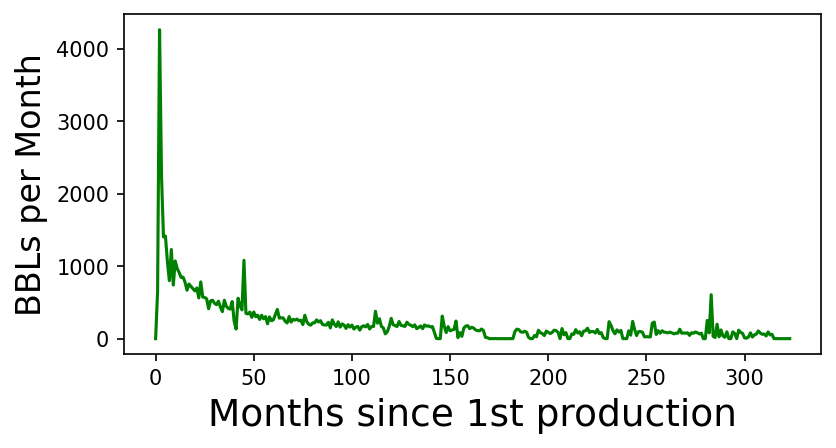

In [6]:
plt.figure(figsize=(6,3), dpi=150)
plt.plot(df.index, df.oilBBLS, color='g')
plt.xlabel('Months since 1st production', size = 18)
plt.ylabel('BBLs per Month', size =16)

# Production Slider

Number of Months
151


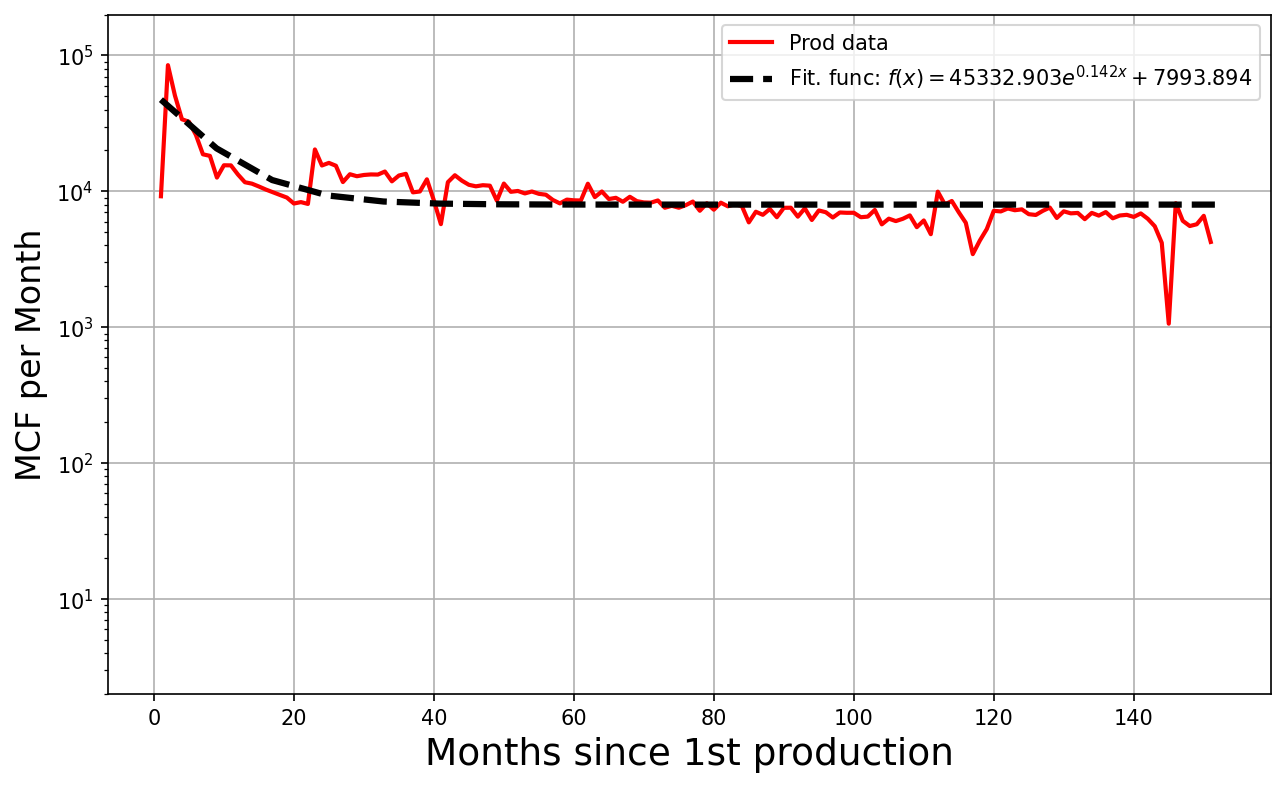

In [12]:

#@title String fields

Fluid_type = 'Gas' #@param ["Oil", "Gas", "Water"]


#@title What Months do you want to show { display-mode: "form" }
MinMonth_slider = 1 #@param {type:"slider", min:1, max:323, step:1}
MaxMonth_slider = 152 #@param {type:"slider", min:0, max:323, step:1}

#print(MinMonth_slider)
#print(MaxMonth_slider)

if MinMonth_slider > MaxMonth_slider:
  print('Error Error!, check min and max month')

def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

plt.figure(figsize=(10,6), dpi=150)

if Fluid_type == "Oil":
    y = df.oilBBLS[MinMonth_slider:MaxMonth_slider]
    p0 = (1.,1.e-12,1.) # starting search koefs
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.oilBBLS[MinMonth_slider:MaxMonth_slider], color='g', linewidth=2, label='Prod data')
elif Fluid_type == "Gas":
    y = df.gasMCF[MinMonth_slider:MaxMonth_slider]  
    p0 = (1.,1.e-12,1.) # starting search koefs
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.gasMCF[MinMonth_slider:MaxMonth_slider], color='r', linewidth=2, label='Prod data')
elif Fluid_type == "Water":
    p0 = (1.,1.e-11,1.) # starting search koefs
    y = df.waterBBLS[MinMonth_slider:MaxMonth_slider]
    plt.semilogy(df.index[MinMonth_slider:MaxMonth_slider], df.waterBBLS[MinMonth_slider:MaxMonth_slider], color='b', linewidth=2, label='Prod data')


x = df.index[MinMonth_slider:MaxMonth_slider]

opt, pcov = curve_fit(model_func, x, y, p0, maxfev=50000)
a, k, b = opt


x2 = np.linspace(MinMonth_slider, MaxMonth_slider, 20)
y2 = model_func(x2, a, k, b)


plt.plot(x2, y2, linewidth=3, linestyle='--', color='black', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))

plt.legend()
plt.grid(True)
plt.xlabel('Months since 1st production', size = 18)

if Fluid_type == "Oil":
  plt.ylim(2,20000)
  plt.ylabel('BBLs per Month', size =16)
elif Fluid_type == "Gas":
  plt.ylim(2,200000)
  plt.ylabel('MCF per Month', size =16)
elif Fluid_type == "water":
  plt.ylim(2,2000)
  plt.ylabel('BBL per month', size =16)


print('Number of Months')
print(MaxMonth_slider- MinMonth_slider,)